### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](P_2_02_Diagrama.PNG)

*Figura 1. Diagrama eléctrico del circuito.*

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.

##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.

#### Paso 3.a) Crear la Función de Transferencia.



In [1]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)


La Función de Transferencia es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.

Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


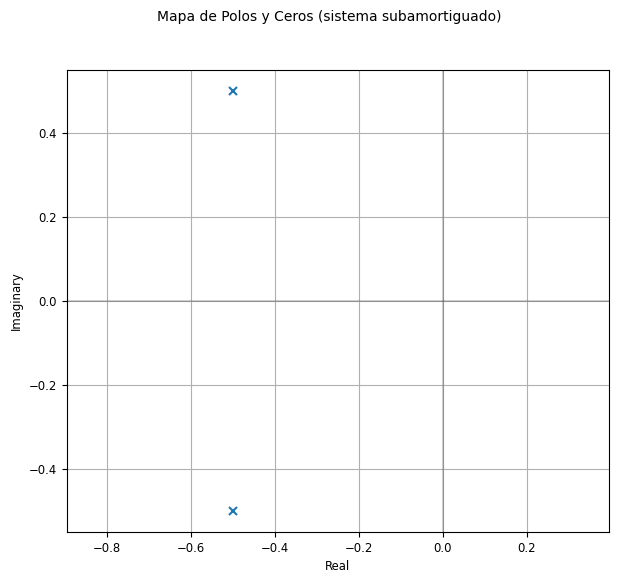

In [2]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()


#### Paso 3.c) Graficar la respuesta del sistema.

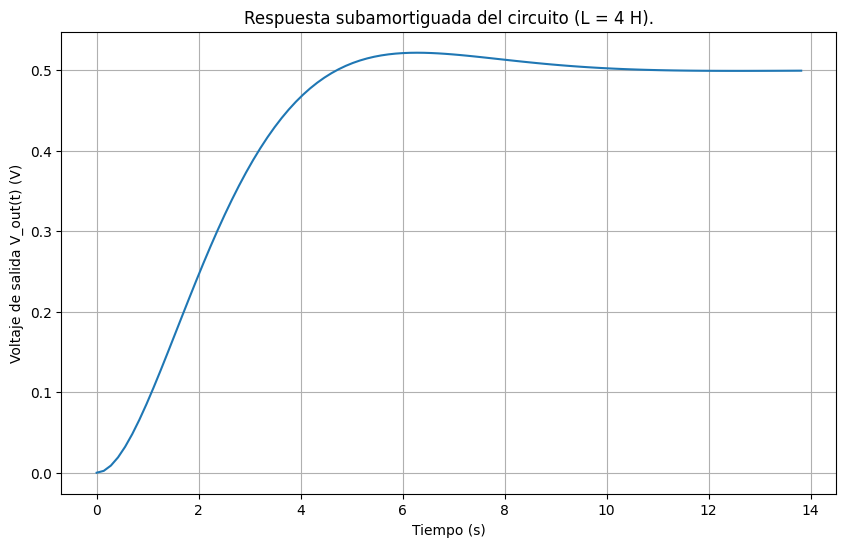

In [3]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. 

##### *Análisis de las raíces para el caso críticamente amortiguado:*

La ecuación característica del sistema es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$

Con los valores:
$$ R_1 = 2\,\Omega, \quad R_2 = 2\,\Omega, \quad C = 1\,F $$

El discriminante debe ser igual a cero para el caso **críticamente amortiguado**:
$$ (L + R_1 R_2 C)^2 - 4(LCR_1)(R_1 + R_2) = 0 $$

Sustituyendo los valores:
$$ (L + 4)^2 - 4(L \cdot 1 \cdot 2)(4) = 0 $$
$$ L^2 + 8L + 16 - 32L = 0 $$
$$ L^2 - 24L + 16 = 0 $$

Resolviendo la ecuación cuadrática:
$$ L = \frac{24 \pm \sqrt{(-24)^2 - 4(1)(16)}}{2(1)} $$
$$ L = \frac{24 \pm \sqrt{576 - 64}}{2} $$
$$ L = \frac{24 \pm \sqrt{512}}{2} $$
$$ L = \frac{24 \pm 16\sqrt{2}}{2} $$
$$ L = 12 \pm 8\sqrt{2} $$

El valor físicamente significativo (positivo y más cercano al caso subamortiguado) es:
$$ L_c = 12 - 8\sqrt{2} \approx 0.686\,H $$

Este valor de **L = 0.686 H** corresponde al caso **críticamente amortiguado**, donde las raíces son reales e iguales.

---

##### *Análisis de las raíces para el caso sobreamortiguado:*

Para el caso **sobreamortiguado**, el discriminante debe ser mayor que cero:
$$ (L + R_1 R_2 C)^2 - 4(LCR_1)(R_1 + R_2) > 0 $$

Probemos con un valor:
$$ L = 0.3\,H $$

Sustituyendo:
$$ (0.3 + 4)^2 - 4(0.3 \cdot 1 \cdot 2)(4) = 0 $$
$$ (4.3)^2 - (9.6) = 18.49 - 9.6 = 8.89 > 0 $$

Como el discriminante es positivo, el sistema tiene dos polos reales, distintos y negativos.  
Por lo tanto:
$$ L_s = 0.3\,H $$

corresponde al **caso sobreamortiguado**.

---

De esta forma:
- Subamortiguado → raíces complejas conjugadas.  
- Críticamente amortiguado → raíces reales e iguales.  
- Sobreamortiguado → raíces reales, distintas y negativas.



Soluciones analíticas para L (discriminante=0):
  L_crit_small = 0.686291501 H
  L_crit_large = 23.313708499 H

Discriminantes numéricos:
  Disc(L_sub=4.0)  = -6.400000e+01  -> subamortiguado
  Disc(L_crit=0.6862915010152396) = 0.000000e+00  -> ≈ 0 (crítico)
  Disc(L_over=0.3) = 8.890000e+00  -> sobreamortiguado

Funciones de transferencia (sin simplificar):
G_sub: <TransferFunction>: sys[49]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4
G_crit: <TransferFunction>: sys[50]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  1.373 s^2 + 4.686 s + 4
G_over: <TransferFunction>: sys[51]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           2
  -------------------
  0.6 s^2 + 4.3 s + 4

--- Subamortiguado (L=4) ---
Polos: [-0.5+0.5j -0.5-0.5j]
Ceros: []


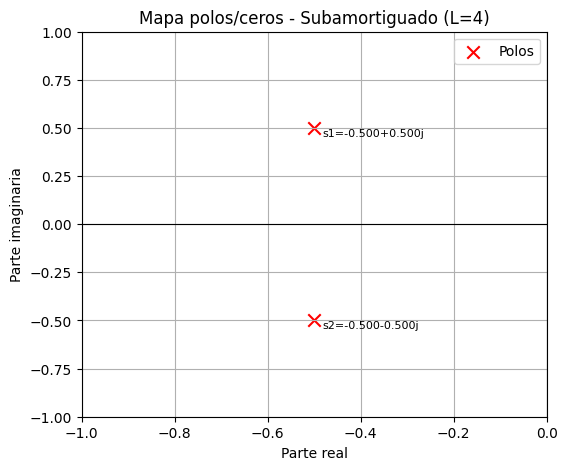

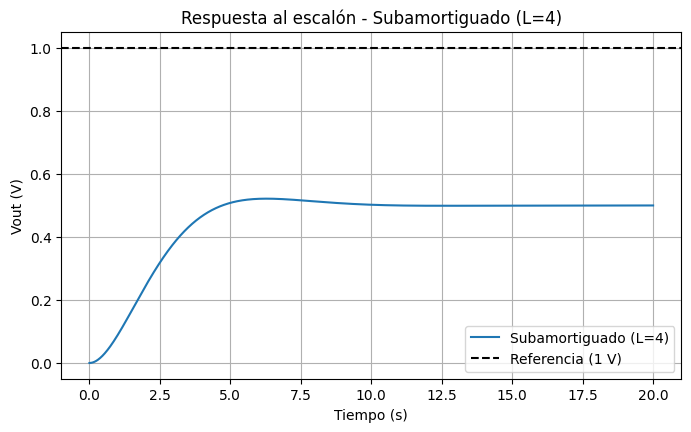


--- Criticamente amortiguado (L≈0.686292) ---
Polos: [-1.70710675+0.j -1.70710681+0.j]
Ceros: []


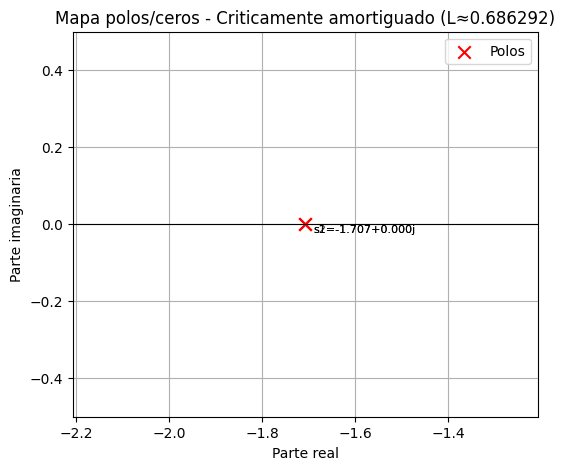

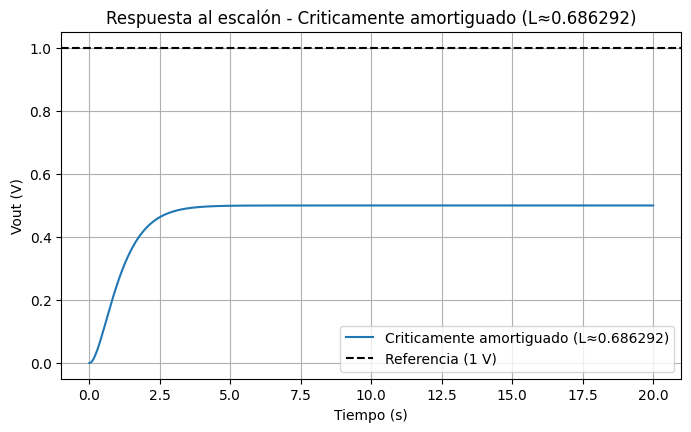


--- Sobreamortiguado (L=0.3) ---
Polos: [-6.06800859+0.j -1.09865808+0.j]
Ceros: []


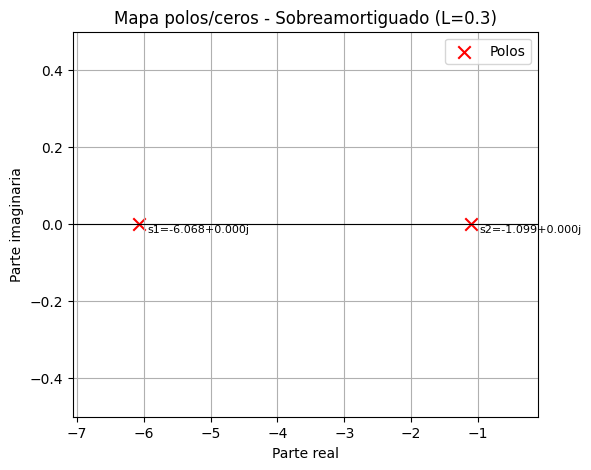

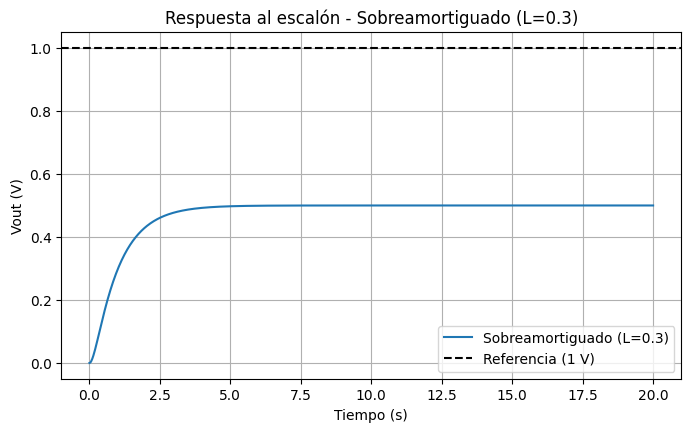

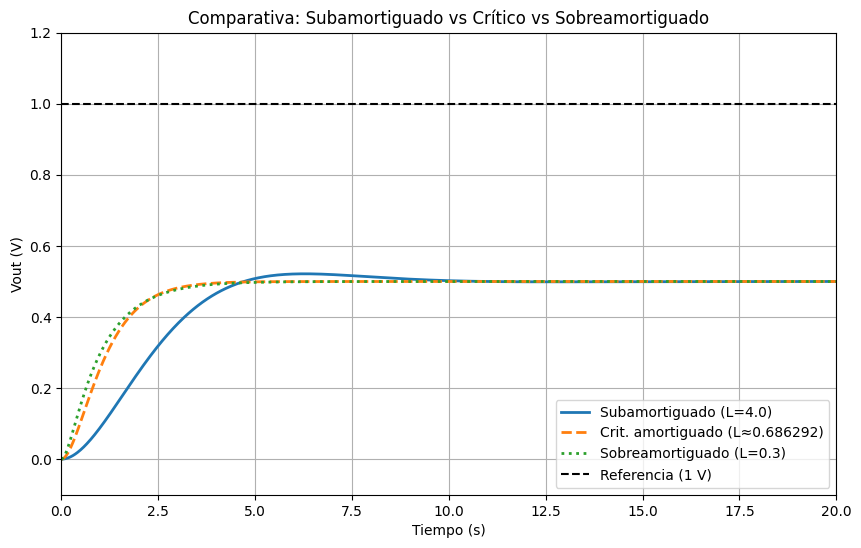


Resumen numérico final de polos (por caso):
 Subamortiguado (L=4): [-0.5+0.5j -0.5-0.5j]
 Crítico (L≈0.686292): [-1.70710675+0.j -1.70710681+0.j]
 Sobreamortiguado (L=0.3): [-6.06800859+0.j -1.09865808+0.j]


In [13]:
# Celda única: cálculo analítico de L crítico, verificación sobreamortiguado,
# creación de TFs y gráficas (polos/ceros + respuestas al escalón)
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Parámetros fijos
R1 = 2.0
R2 = 2.0
C  = 1.0

# 1) RESOLVER ANALÍTICAMENTE L QUE HACE DISCRIMINANTE = 0
# Para el polinomio a s^2 + b s + c con:
# a = L*C*R1, b = L + R1*R2*C, c = R1 + R2
# Discriminante (en L): (L + R1*R2*C)^2 - 4*(L*C*R1)*(R1+R2) = 0
# Sustituimos R1=2, R2=2, C=1 -> resolución directa:

# coeficientes de la ecuación cuadrática en L: L^2 - 24L + 16 = 0  (derivado manualmente)
A = 1.0
B = -24.0
C_quad = 16.0
L_roots = np.roots([A, B, C_quad])  # devuelve [L_small, L_large]
L_roots = np.sort(L_roots)  # orden ascendente

L_crit_small = float(L_roots[0])
L_crit_large = float(L_roots[1])

print("Soluciones analíticas para L (discriminante=0):")
print(f"  L_crit_small = {L_crit_small:.9f} H")
print(f"  L_crit_large = {L_crit_large:.9f} H")

# 2) Elegir valores de L para los 3 casos:
L_sub = 4.0               # caso subamortiguado 
L_crit = L_crit_small     # usamos el valor crítico pequeño (~0.686...)
L_over = 0.3              # ejemplo de L menor que L_crit_small -> sobreamortiguado

# Función que devuelve discriminante numérico para un L dado
def discriminante(L_value):
    a = L_value * C * R1
    b = (L_value + R1 * R2 * C)
    c = (R1 + R2)
    return b**2 - 4*a*c

print("\nDiscriminantes numéricos:")
print(f"  Disc(L_sub={L_sub})  = {discriminante(L_sub):.6e}  -> {'subamortiguado' if discriminante(L_sub)<0 else 'otro'}")
print(f"  Disc(L_crit={L_crit}) = {discriminante(L_crit):.6e}  -> {'≈ 0 (crítico)' if np.isclose(discriminante(L_crit),0,rtol=0,atol=1e-9) else 'otro'}")
print(f"  Disc(L_over={L_over}) = {discriminante(L_over):.6e}  -> {'sobreamortiguado' if discriminante(L_over)>0 else 'otro'}")

# 3) Construcción de las funciones de transferencia (forma derivada en el enunciado)
def build_G(L_value):
    num = [R2]   # R2
    den = [L_value * C * R1, (L_value + R1 * R2 * C), (R1 + R2)]
    return ct.tf(num, den)

G_sub = build_G(L_sub)
G_crit = build_G(L_crit)
G_over = build_G(L_over)

print("\nFunciones de transferencia (sin simplificar):")
print("G_sub:", G_sub)
print("G_crit:", G_crit)
print("G_over:", G_over)

# 4) Función auxiliar para graficar polos/ceros (con ajuste de límites para que sean visibles)
def plot_pzmap_custom(G, title):
    poles = ct.poles(G)
    zeros = ct.zeros(G)
    plt.figure(figsize=(6,5))
    # polos
    if len(poles) > 0:
        plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', s=80, label='Polos')
        for i,p in enumerate(poles):
            plt.annotate(f"s{ i+1 }={p:.3f}", (np.real(p), np.imag(p)), textcoords="offset points", xytext=(6,-6), fontsize=8)
    # ceros
    if len(zeros) > 0:
        plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b', s=80, label='Ceros')
        for i,z in enumerate(zeros):
            plt.annotate(f"z{ i+1 }={z:.3f}", (np.real(z), np.imag(z)), textcoords="offset points", xytext=(6,6), fontsize=8)
    plt.axhline(0, color='k', linewidth=0.8)
    plt.axvline(0, color='k', linewidth=0.8)
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria")
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    # ajustar límites con margen
    all_points = np.concatenate([poles, zeros]) if (len(zeros)>0) else poles
    if len(all_points) == 0:
        plt.xlim(-1,1); plt.ylim(-1,1)
    else:
        real_vals = np.real(all_points)
        imag_vals = np.imag(all_points)
        xr = max(abs(real_vals.min()), abs(real_vals.max()))
        yr = max(abs(imag_vals.min()), abs(imag_vals.max()))
        # si los polos están todos en el eje real (imag=0), dar un rango imaginario pequeño
        xpad = max(0.5, 0.2 * (real_vals.max() - real_vals.min() if real_vals.max()!=real_vals.min() else 1.0))
        ypad = max(0.5, 0.2 * (imag_vals.max() - imag_vals.min() if imag_vals.max()!=imag_vals.min() else 1.0))
        plt.xlim(real_vals.min() - xpad, real_vals.max() + xpad)
        plt.ylim(imag_vals.min() - ypad, imag_vals.max() + ypad)
    plt.show()

# Mostrar polos/ceros y las respuestas individuales
for G, Lval, label in [(G_sub, L_sub, "Subamortiguado (L=4)"),
                       (G_crit, L_crit, f"Criticamente amortiguado (L≈{L_crit:.6f})"),
                       (G_over, L_over, f"Sobreamortiguado (L={L_over})")]:
    print(f"\n--- {label} ---")
    print("Polos:", ct.poles(G))
    print("Ceros:", ct.zeros(G))
    plot_pzmap_custom(G, f"Mapa polos/ceros - {label}")
    # respuesta al escalón (tiempo suficiente para ver comportamiento)
    t = np.linspace(0, 20, 1000)
    tt, y = ct.step_response(G, T=t)
    plt.figure(figsize=(8,4.5))
    plt.plot(tt, y, label=label)
    plt.axhline(1.0, color='k', linestyle='--', label='Referencia (1 V)')
    plt.title(f"Respuesta al escalón - {label}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Vout (V)")
    plt.grid(True)
    plt.legend()
    plt.show()

# 5) Gráfica comparativa de las tres respuestas en la misma figura
t = np.linspace(0, 20, 1000)
_, y_sub = ct.step_response(G_sub, T=t)
_, y_crit = ct.step_response(G_crit, T=t)
_, y_over = ct.step_response(G_over, T=t)

plt.figure(figsize=(10,6))
plt.plot(t, y_sub, label=f'Subamortiguado (L={L_sub})', linewidth=2)
plt.plot(t, y_crit, label=f'Crit. amortiguado (L≈{L_crit:.6f})', linestyle='--', linewidth=2)
plt.plot(t, y_over, label=f'Sobreamortiguado (L={L_over})', linestyle=':', linewidth=2)
plt.axhline(1.0, color='k', linestyle='--', label='Referencia (1 V)')
plt.title('Comparativa: Subamortiguado vs Crítico vs Sobreamortiguado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Vout (V)')
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(min(y_over.min(), y_sub.min(), y_crit.min()) - 0.1, 1.2)
plt.show()

# resumen numérico fina
print("\nResumen numérico final de polos (por caso):")
print(" Subamortiguado (L=4):", ct.poles(G_sub))
print(f" Crítico (L≈{L_crit:.6f}):", ct.poles(G_crit))
print(" Sobreamortiguado (L=0.3):", ct.poles(G_over))



